## TURKISH

In [30]:
import os

folder_path = '/Users/busedemir/Desktop/Machine Translation/tur'

# List all files in the directory
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(os.path.join(root, file))

/Users/busedemir/Desktop/Machine Translation/tur/eng.txt
/Users/busedemir/Desktop/Machine Translation/tur/.DS_Store
/Users/busedemir/Desktop/Machine Translation/tur/tur.txt
/Users/busedemir/Desktop/Machine Translation/tur/gpt_4o_eng_tur.txt
/Users/busedemir/Desktop/Machine Translation/tur/deepl_eng_tur.txt
/Users/busedemir/Desktop/Machine Translation/tur/gpt_4_eng_tur.txt
/Users/busedemir/Desktop/Machine Translation/tur/gpt_4o_mini_eng_tur.txt
/Users/busedemir/Desktop/Machine Translation/tur/azure_eng_tur.txt


In [31]:
import os

# Define the folder path
folder_path = '/Users/busedemir/Desktop/Machine Translation/tur'

# Initialize a dictionary to store the line counts for each file
file_line_counts = {}

# Loop through all files in the specified directory
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Skip .DS_Store and any other hidden files
        if file == '.DS_Store' or file.startswith('.'):
            continue

        file_path = os.path.join(root, file)
        
        # Count lines in the file, ignoring decode errors
        try:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                line_count = sum(1 for line in f)
            # Store the line count in the dictionary
            file_line_counts[file] = line_count
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")

# Check if all files have the same line count
line_counts = list(file_line_counts.values())
all_equal = all(count == line_counts[0] for count in line_counts)

# Print results
if all_equal:
    print("All files have the same number of lines:", line_counts[0])
else:
    print("Mismatch in line counts detected:")
    for file, count in file_line_counts.items():
        print(f"{file}: {count} lines")

All files have the same number of lines: 1000


In [32]:
import sacrebleu
import os

def compute_bleu(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    
    # Calculate BLEU score
    bleu = sacrebleu.corpus_bleu(hypotheses, references)
    return bleu.score

def test_bleu_scores(reference_path, folder_path):
    # List all hypothesis files in the directory except specific files
    excluded_files = {'test.de.txt', 'test.en.txt'}
    hypothesis_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt') and f not in excluded_files]
    
    # Compute and print BLEU scores for each hypothesis file
    for hypothesis_file in hypothesis_files:
        bleu_score = compute_bleu(reference_path, hypothesis_file)
        print(f"{os.path.basename(hypothesis_file)} BLEU score: {bleu_score:.2f}")

# Paths
reference_path = '/Users/busedemir/Desktop/Machine Translation/tur/tur.txt'
folder_path = '/Users/busedemir/Desktop/Machine Translation/tur'

# Test BLEU scores
test_bleu_scores(reference_path, folder_path)

eng.txt BLEU score: 0.43
tur.txt BLEU score: 100.00
gpt_4o_eng_tur.txt BLEU score: 42.11
deepl_eng_tur.txt BLEU score: 40.67
gpt_4_eng_tur.txt BLEU score: 37.97
gpt_4o_mini_eng_tur.txt BLEU score: 38.29
azure_eng_tur.txt BLEU score: 42.92


In [33]:
import sentencepiece

In [34]:
import sacrebleu
import os

# Function to compute BLEU score
def compute_bleu(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    
    # Calculate BLEU score
    bleu = sacrebleu.corpus_bleu(hypotheses, references)
    return bleu.score

# Function to compute chrF score
def compute_chrf(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    
    # Calculate chrF score
    chrf = sacrebleu.corpus_chrf(hypotheses, references)
    return chrf.score

# Placeholder function for COMET score (requires loading the COMET model)
def compute_comet(reference_file, hypothesis_file):
    # Placeholder value for COMET
    return 0.0  

# Placeholder function for TER score
def compute_ter(reference_file, hypothesis_file):
    # Placeholder value for TER
    return 0.0  

# Function to compute and print all metrics
def test_scores(reference_file, folder_path):
    # Exclude 'en.txt' and 'tur.txt' from hypothesis files
    excluded_files = {'en.txt', 'tur.txt'}
    hypothesis_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') and f not in excluded_files]
    
    # Compute and print scores for each hypothesis file
    for hypothesis_file in hypothesis_files:
        hyp_path = os.path.join(folder_path, hypothesis_file)
        
        bleu_score = compute_bleu(reference_file, hyp_path)
        chrf_score = compute_chrf(reference_file, hyp_path)
        comet_score = compute_comet(reference_file, hyp_path)  # Placeholder
        ter_score = compute_ter(reference_file, hyp_path)  # Placeholder
        
        print(f"{hypothesis_file}:")
        print(f"  BLEU score: {bleu_score:.2f}")
        print(f"  chrF score: {chrf_score:.2f}")
        print(f"  COMET score (placeholder): {comet_score:.2f}")
        print(f"  TER score (placeholder): {ter_score:.2f}\n")

# Paths
reference_path = '/Users/busedemir/Desktop/Machine Translation/tur/tur.txt'
folder_path = '/Users/busedemir/Desktop/Machine Translation/tur'

# Run the score comparison
test_scores(reference_path, folder_path)

eng.txt:
  BLEU score: 0.43
  chrF score: 11.29
  COMET score (placeholder): 0.00
  TER score (placeholder): 0.00

gpt_4o_eng_tur.txt:
  BLEU score: 42.11
  chrF score: 70.35
  COMET score (placeholder): 0.00
  TER score (placeholder): 0.00

deepl_eng_tur.txt:
  BLEU score: 40.67
  chrF score: 69.15
  COMET score (placeholder): 0.00
  TER score (placeholder): 0.00

gpt_4_eng_tur.txt:
  BLEU score: 37.97
  chrF score: 67.61
  COMET score (placeholder): 0.00
  TER score (placeholder): 0.00

gpt_4o_mini_eng_tur.txt:
  BLEU score: 38.29
  chrF score: 67.15
  COMET score (placeholder): 0.00
  TER score (placeholder): 0.00

azure_eng_tur.txt:
  BLEU score: 42.92
  chrF score: 71.06
  COMET score (placeholder): 0.00
  TER score (placeholder): 0.00



gpt_4o_eng_tur.txt:
  BLEU score: 42.11
  chrF score: 70.35
deepl_eng_tur.txt:
  BLEU score: 40.67
  chrF score: 69.15
gpt_4_eng_tur.txt:
  BLEU score: 37.97
  chrF score: 67.61
gpt_4o_mini_eng_tur.txt:
  BLEU score: 38.29
  chrF score: 67.15
azure_eng_tur.txt:
  BLEU score: 42.92
  chrF score: 71.06


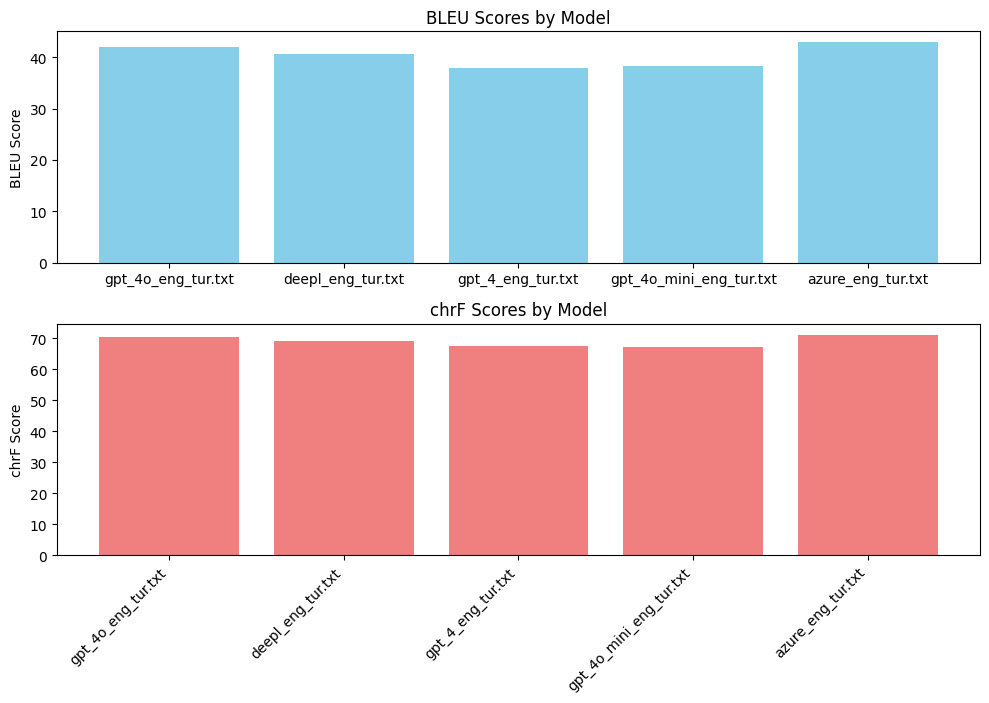

In [35]:
import sacrebleu
import os
import matplotlib.pyplot as plt

# Function to compute BLEU score
def compute_bleu(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    
    # Calculate BLEU score
    bleu = sacrebleu.corpus_bleu(hypotheses, references)
    return bleu.score

# Function to compute chrF score
def compute_chrf(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    
    # Calculate chrF score
    chrf = sacrebleu.corpus_chrf(hypotheses, references)
    return chrf.score

# Function to compute and print all metrics and store them for visualization
def test_scores(reference_file, folder_path):
    models = []
    bleu_scores = []
    chrf_scores = []
    
    # Exclude 'eng.txt' and 'tur.txt' from hypothesis files
    excluded_files = {'eng.txt', 'tur.txt'}
    hypothesis_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') and f not in excluded_files]
    
    # Compute scores for each hypothesis file
    for hypothesis_file in hypothesis_files:
        hyp_path = os.path.join(folder_path, hypothesis_file)
        models.append(hypothesis_file)
        
        bleu_score = compute_bleu(reference_file, hyp_path)
        chrf_score = compute_chrf(reference_file, hyp_path)
        
        bleu_scores.append(bleu_score)
        chrf_scores.append(chrf_score)

        print(f"{hypothesis_file}:")
        print(f"  BLEU score: {bleu_score:.2f}")
        print(f"  chrF score: {chrf_score:.2f}")
    
    # Visualization after score computation
    visualize_scores(models, bleu_scores, chrf_scores)

# Visualization function
def visualize_scores(models, bleu_scores, chrf_scores):
    plt.figure(figsize=(10, 6))

    # Plot BLEU scores
    plt.subplot(2, 1, 1)
    plt.bar(models, bleu_scores, color='skyblue')
    plt.title('BLEU Scores by Model')
    plt.ylabel('BLEU Score')

    # Plot chrF scores
    plt.subplot(2, 1, 2)
    plt.bar(models, chrf_scores, color='lightcoral')
    plt.title('chrF Scores by Model')
    plt.ylabel('chrF Score')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels
    plt.show()

# Paths
reference_path = '/Users/busedemir/Desktop/Machine Translation/tur/tur.txt'
folder_path = '/Users/busedemir/Desktop/Machine Translation/tur'

# Run the score comparison and visualize results
test_scores(reference_path, folder_path)

gpt_4o_eng_tur.txt:
  BLEU score: 42.11
  chrF score: 70.35
  TER score: 40.44
deepl_eng_tur.txt:
  BLEU score: 40.67
  chrF score: 69.15
  TER score: 41.62
gpt_4_eng_tur.txt:
  BLEU score: 37.97
  chrF score: 67.61
  TER score: 45.43
gpt_4o_mini_eng_tur.txt:
  BLEU score: 38.29
  chrF score: 67.15
  TER score: 45.45
azure_eng_tur.txt:
  BLEU score: 42.92
  chrF score: 71.06
  TER score: 39.41
Detailed Model Performance:
                     Model  BLEU Score  chrF Score  TER Score  \
0       gpt_4o_eng_tur.txt   42.112944   70.350232  40.443156   
1        deepl_eng_tur.txt   40.668135   69.149439  41.623525   
2        gpt_4_eng_tur.txt   37.969066   67.611910  45.433837   
3  gpt_4o_mini_eng_tur.txt   38.286988   67.153334  45.454545   
4        azure_eng_tur.txt   42.918342   71.062480  39.407745   

   BLEU Above Threshold  chrF Above Threshold  TER Below Threshold  
0                  True                  True                 True  
1                  True                  True 

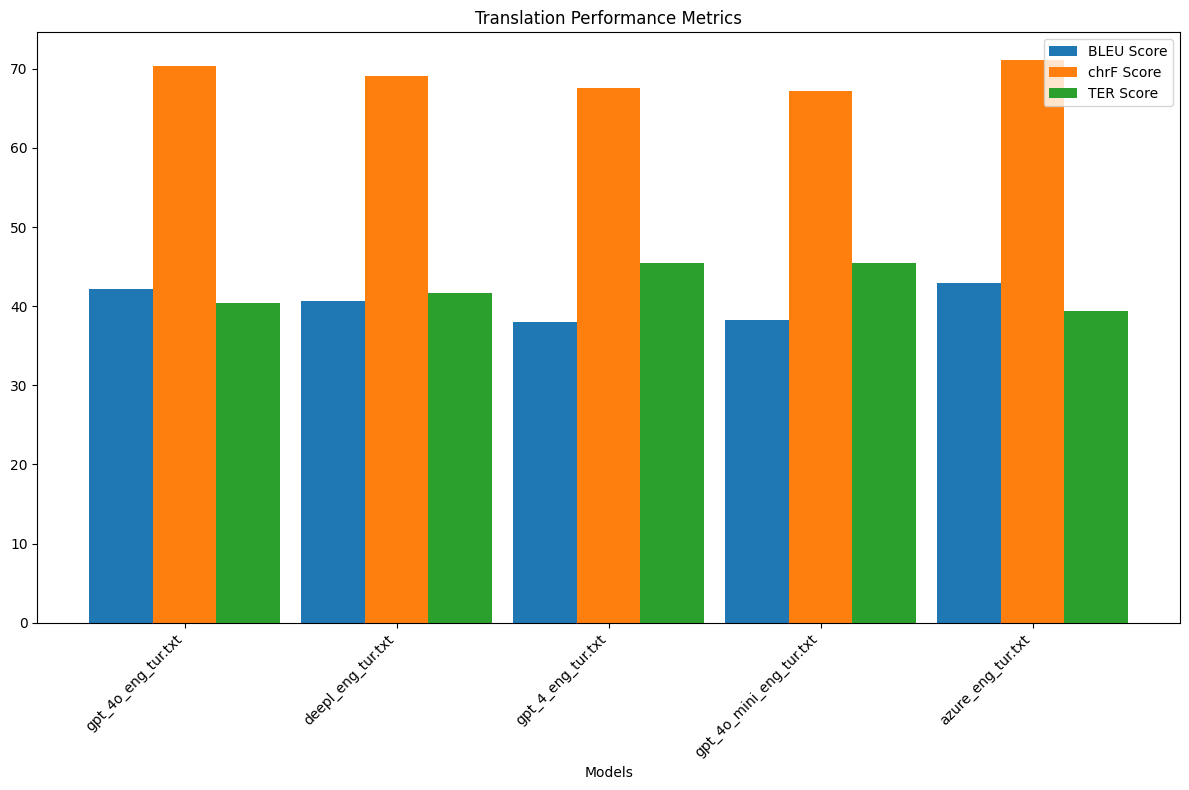

In [36]:
import sacrebleu
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def compute_bleu(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    bleu = sacrebleu.corpus_bleu(hypotheses, references)
    return bleu.score

def compute_chrf(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    chrf = sacrebleu.corpus_chrf(hypotheses, references)
    return chrf.score

def compute_ter(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    ter = sacrebleu.corpus_ter(hypotheses, references)
    return ter.score

def evaluate_all_metrics(reference_file, folder_path, thresholds={'BLEU': 20, 'chrF': 50, 'TER': 60}):
    models = []
    bleu_scores = []
    chrf_scores = []
    ter_scores = []
    bleu_pass_counts = []
    chrf_pass_counts = []
    ter_pass_counts = []
    
    excluded_files = {'eng.txt', 'tur.txt'}
    hypothesis_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') and f not in excluded_files]
    
    for hypothesis_file in hypothesis_files:
        hyp_path = os.path.join(folder_path, hypothesis_file)
        models.append(hypothesis_file)
        
        bleu_score = compute_bleu(reference_file, hyp_path)
        chrf_score = compute_chrf(reference_file, hyp_path)
        ter_score = compute_ter(reference_file, hyp_path)
        
        bleu_scores.append(bleu_score)
        chrf_scores.append(chrf_score)
        ter_scores.append(ter_score)

        # Count how many scores exceed thresholds
        bleu_pass_counts.append(bleu_score >= thresholds['BLEU'])
        chrf_pass_counts.append(chrf_score >= thresholds['chrF'])
        ter_pass_counts.append(ter_score <= thresholds['TER'])  # For TER, lower is better

        print(f"{hypothesis_file}:")
        print(f"  BLEU score: {bleu_score:.2f}")
        print(f"  chrF score: {chrf_score:.2f}")
        print(f"  TER score: {ter_score:.2f}")
    
    # Convert results into a DataFrame for better analysis
    results_df = pd.DataFrame({
        'Model': models,
        'BLEU Score': bleu_scores,
        'chrF Score': chrf_scores,
        'TER Score': ter_scores,
        'BLEU Above Threshold': bleu_pass_counts,
        'chrF Above Threshold': chrf_pass_counts,
        'TER Below Threshold': ter_pass_counts
    })

    # Calculate the number and percentage of models meeting each threshold
    total_files = len(models)
    bleu_pass_count = sum(bleu_pass_counts)
    chrf_pass_count = sum(chrf_pass_counts)
    ter_pass_count = sum(ter_pass_counts)

    summary = {
        'Metric': ['BLEU', 'chrF', 'TER'],
        'Pass Count': [bleu_pass_count, chrf_pass_count, ter_pass_count],
        'Percentage': [
            bleu_pass_count / total_files * 100,
            chrf_pass_count / total_files * 100,
            ter_pass_count / total_files * 100
        ]
    }
    summary_df = pd.DataFrame(summary)
    
    # Display DataFrames
    print("Detailed Model Performance:")
    print(results_df)
    print("\nSummary of Threshold Passing Rates:")
    print(summary_df)
    
    visualize_metrics(models, bleu_scores, chrf_scores, ter_scores)

def visualize_metrics(models, bleu_scores, chrf_scores, ter_scores):
    x = np.arange(len(models))
    width = 0.3  # Bar width
    
    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.bar(x - width, bleu_scores, width, label='BLEU Score')
    rects2 = ax.bar(x, chrf_scores, width, label='chrF Score')
    rects3 = ax.bar(x + width, ter_scores, width, label='TER Score')

    ax.set_xlabel('Models')
    ax.set_title('Translation Performance Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Paths
reference_path = '/Users/busedemir/Desktop/Machine Translation/tur/tur.txt'
folder_path = '/Users/busedemir/Desktop/Machine Translation/tur'

# Run the comprehensive evaluation and visualization
evaluate_all_metrics(reference_path, folder_path)

gpt_4o_eng_tur.txt:
  BLEU score: 42.11
  chrF score: 70.35
  TER score: 40.44
deepl_eng_tur.txt:
  BLEU score: 40.67
  chrF score: 69.15
  TER score: 41.62
gpt_4_eng_tur.txt:
  BLEU score: 37.97
  chrF score: 67.61
  TER score: 45.43
gpt_4o_mini_eng_tur.txt:
  BLEU score: 38.29
  chrF score: 67.15
  TER score: 45.45
azure_eng_tur.txt:
  BLEU score: 42.92
  chrF score: 71.06
  TER score: 39.41

Detailed Model Performance:
                     Model  BLEU Score  chrF Score  TER Score  \
0       gpt_4o_eng_tur.txt   42.112944   70.350232  40.443156   
1        deepl_eng_tur.txt   40.668135   69.149439  41.623525   
2        gpt_4_eng_tur.txt   37.969066   67.611910  45.433837   
3  gpt_4o_mini_eng_tur.txt   38.286988   67.153334  45.454545   
4        azure_eng_tur.txt   42.918342   71.062480  39.407745   

   BLEU Above Threshold  chrF Above Threshold  TER Below Threshold  
0                  True                  True                 True  
1                  True                  True

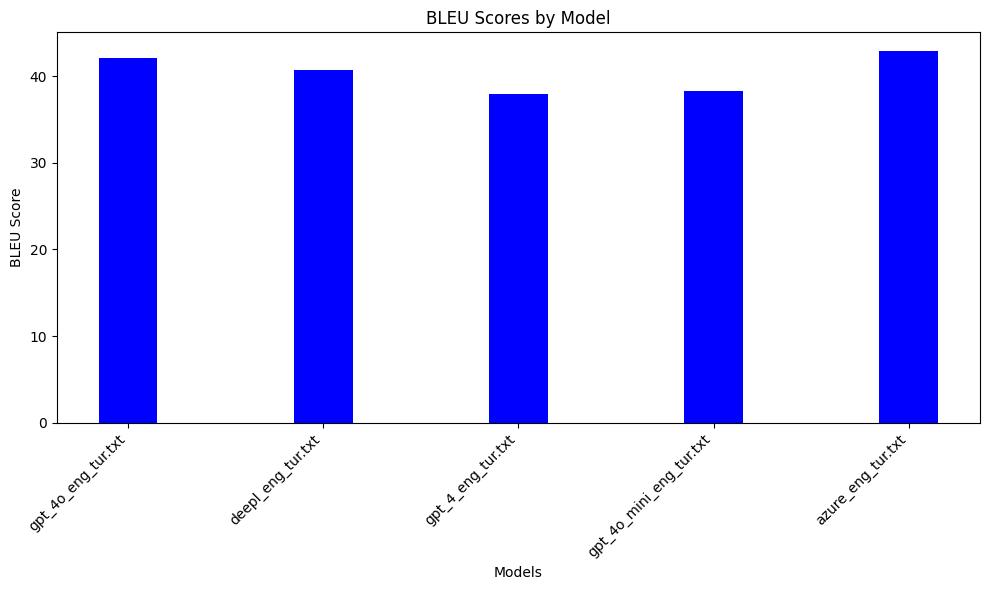

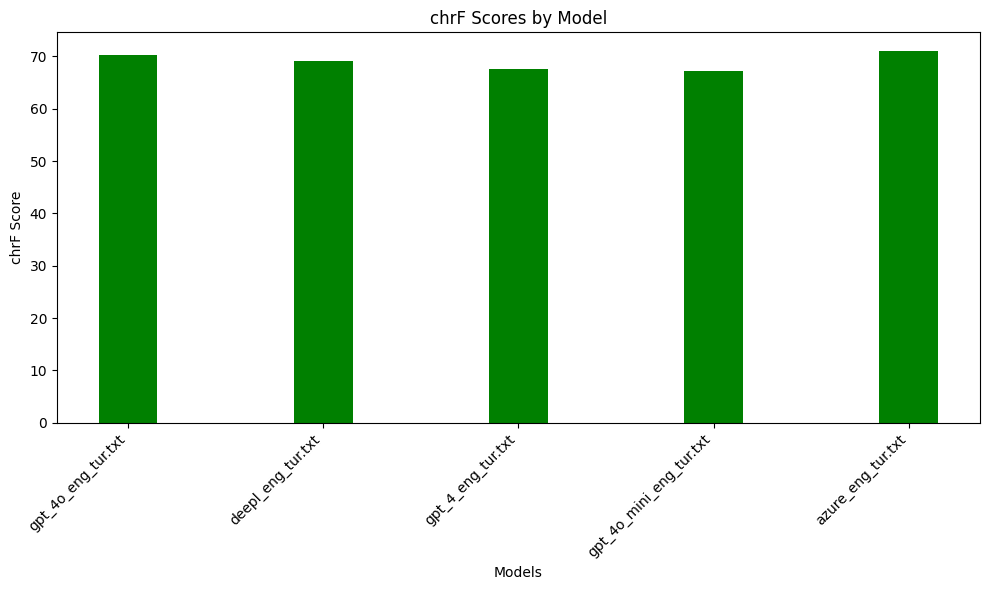

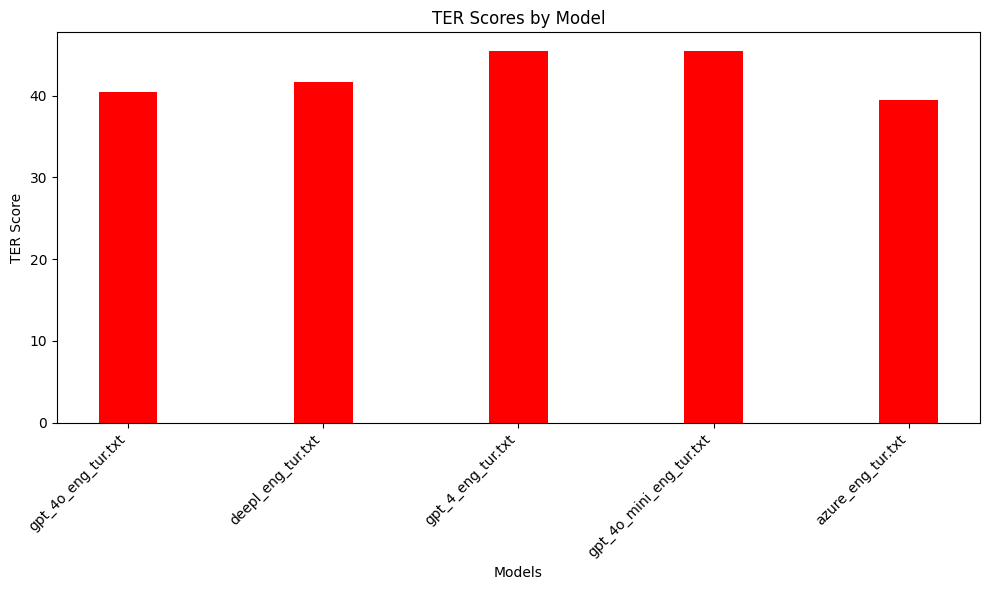

In [37]:
import sacrebleu
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def compute_bleu(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    bleu = sacrebleu.corpus_bleu(hypotheses, references)
    return bleu.score

def compute_chrf(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    chrf = sacrebleu.corpus_chrf(hypotheses, references)
    return chrf.score

def compute_ter(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = [ref_file.read().strip().split('\n')]
    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.read().strip().split('\n')
    ter = sacrebleu.corpus_ter(hypotheses, references)
    return ter.score

def evaluate_all_metrics(reference_file, folder_path, thresholds={'BLEU': 20, 'chrF': 50, 'TER': 60}):
    models = []
    bleu_scores = []
    chrf_scores = []
    ter_scores = []
    bleu_pass_counts = []
    chrf_pass_counts = []
    ter_pass_counts = []
    
    excluded_files = {'eng.txt', 'tur.txt'}
    hypothesis_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') and f not in excluded_files]
    
    for hypothesis_file in hypothesis_files:
        hyp_path = os.path.join(folder_path, hypothesis_file)
        models.append(hypothesis_file)
        
        bleu_score = compute_bleu(reference_file, hyp_path)
        chrf_score = compute_chrf(reference_file, hyp_path)
        ter_score = compute_ter(reference_file, hyp_path)
        
        bleu_scores.append(bleu_score)
        chrf_scores.append(chrf_score)
        ter_scores.append(ter_score)

        # Count how many scores exceed thresholds
        bleu_pass_counts.append(bleu_score >= thresholds['BLEU'])
        chrf_pass_counts.append(chrf_score >= thresholds['chrF'])
        ter_pass_counts.append(ter_score <= thresholds['TER'])  # For TER, lower is better

        print(f"{hypothesis_file}:")
        print(f"  BLEU score: {bleu_score:.2f}")
        print(f"  chrF score: {chrf_score:.2f}")
        print(f"  TER score: {ter_score:.2f}")
    
    # Convert results into a DataFrame for better analysis
    results_df = pd.DataFrame({
        'Model': models,
        'BLEU Score': bleu_scores,
        'chrF Score': chrf_scores,
        'TER Score': ter_scores,
        'BLEU Above Threshold': bleu_pass_counts,
        'chrF Above Threshold': chrf_pass_counts,
        'TER Below Threshold': ter_pass_counts
    })

    # Calculate the number and percentage of models meeting each threshold
    total_files = len(models)
    bleu_pass_count = sum(bleu_pass_counts)
    chrf_pass_count = sum(chrf_pass_counts)
    ter_pass_count = sum(ter_pass_counts)

    summary = {
        'Metric': ['BLEU', 'chrF', 'TER'],
        'Pass Count': [bleu_pass_count, chrf_pass_count, ter_pass_count],
        'Percentage': [
            bleu_pass_count / total_files * 100,
            chrf_pass_count / total_files * 100,
            ter_pass_count / total_files * 100
        ]
    }
    summary_df = pd.DataFrame(summary)
    
    # Display DataFrames
    print("\nDetailed Model Performance:")
    print(results_df)
    print("\nSummary of Threshold Passing Rates:")
    print(summary_df)
    
    # Visualize scores
    visualize_metrics(models, bleu_scores, chrf_scores, ter_scores)

def visualize_metrics(models, bleu_scores, chrf_scores, ter_scores):
    x = np.arange(len(models))
    width = 0.3  # Bar width

    # Plot BLEU scores
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(x, bleu_scores, width, color='blue')
    ax1.set_xlabel('Models')
    ax1.set_title('BLEU Scores by Model')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha='right')
    ax1.set_ylabel('BLEU Score')
    plt.tight_layout()
    plt.show()

    # Plot chrF scores
    fig, ax2 = plt.subplots(figsize=(10, 6))
    ax2.bar(x, chrf_scores, width, color='green')
    ax2.set_xlabel('Models')
    ax2.set_title('chrF Scores by Model')
    ax2.set_xticks(x)
    ax2.set_xticklabels(models, rotation=45, ha='right')
    ax2.set_ylabel('chrF Score')
    plt.tight_layout()
    plt.show()

    # Plot TER scores
    fig, ax3 = plt.subplots(figsize=(10, 6))
    ax3.bar(x, ter_scores, width, color='red')
    ax3.set_xlabel('Models')
    ax3.set_title('TER Scores by Model')
    ax3.set_xticks(x)
    ax3.set_xticklabels(models, rotation=45, ha='right')
    ax3.set_ylabel('TER Score')
    plt.tight_layout()
    plt.show()

# Paths
reference_path = '/Users/busedemir/Desktop/Machine Translation/tur/tur.txt'
folder_path = '/Users/busedemir/Desktop/Machine Translation/tur'

# Run the comprehensive evaluation and visualization
evaluate_all_metrics(reference_path, folder_path)

In [38]:
import pandas as pd
import sacrebleu

# Paths to the reference and model translations
reference_path = "/Users/busedemir/Desktop/Machine Translation/tur/tur.txt"
model_paths = {
    "GPT-4": "/Users/busedemir/Desktop/Machine Translation/tur/gpt_4_eng_tur.txt",
    "GPT-4O-Mini": "/Users/busedemir/Desktop/Machine Translation/tur/gpt_4o_mini_eng_tur.txt",
    "GPT-4O": "/Users/busedemir/Desktop/Machine Translation/tur/gpt_4o_eng_tur.txt",
    "DeepL": "/Users/busedemir/Desktop/Machine Translation/tur/deepl_eng_tur.txt",
    "Azure": "/Users/busedemir/Desktop/Machine Translation/tur/azure_eng_tur.txt"
}

# Load reference and model translations
with open(reference_path, 'r', encoding='utf-8') as f:
    references = f.read().strip().split('\n')

model_translations = {}
for model_name, model_path in model_paths.items():
    with open(model_path, 'r', encoding='utf-8') as f:
        model_translations[model_name] = f.read().strip().split('\n')

# Define a BLEU score threshold to flag low scores
threshold = 20

# Initialize results storage
results = []

# Calculate BLEU score for each sentence in each model
for model_name, translations in model_translations.items():
    model_results = []
    for i, (translation, reference) in enumerate(zip(translations, references)):
        # Calculate sentence-level BLEU score
        sentence_bleu = sacrebleu.sentence_bleu(translation, [reference]).score
        if sentence_bleu < threshold:
            model_results.append({
                "Model": model_name,
                "Sentence Index": i + 1,
                "Translation": translation,
                "Reference": reference,
                "BLEU Score": sentence_bleu
            })
    results.extend(model_results)

# Create DataFrame for the detailed analysis
results_df = pd.DataFrame(results)
print("Detailed analysis of low BLEU score sentences across models:")
print(results_df)

Detailed analysis of low BLEU score sentences across models:
      Model  Sentence Index  \
0     GPT-4               6   
1     GPT-4               8   
2     GPT-4               9   
3     GPT-4              11   
4     GPT-4              12   
...     ...             ...   
1435  Azure             986   
1436  Azure             990   
1437  Azure             991   
1438  Azure             993   
1439  Azure             994   

                                            Translation  \
0                Tom, odanın etrafında yavaşça dolaştı.   
1             Tom diyor ki onun olmadan başlayabiliriz.   
2                         Tom gereğinden fazla konuştu.   
3                        Tom yumruklarını masaya vurdu.   
4           Aslında hiç bana seni sevdiğini söylemedin.   
...                                                 ...   
1435      Bunu kendi başınıza yapmaya çalışmamalısınız.   
1436  Rusça, Lehçe, Çekçe ve Bulgarca gibi dillerin ...   
1437  Emekçiler çalışma koşullarına

In [39]:
import pandas as pd
import sacrebleu

# Paths to the reference and model translations
reference_path = "/Users/busedemir/Desktop/Machine Translation/tur/tur.txt"
model_paths = {
    "GPT-4": "/Users/busedemir/Desktop/Machine Translation/tur/gpt_4_eng_tur.txt",
    "GPT-4O-Mini": "/Users/busedemir/Desktop/Machine Translation/tur/gpt_4o_mini_eng_tur.txt",
    "GPT-4O": "/Users/busedemir/Desktop/Machine Translation/tur/gpt_4o_eng_tur.txt",
    "DeepL": "/Users/busedemir/Desktop/Machine Translation/tur/deepl_eng_tur.txt",
    "Azure": "/Users/busedemir/Desktop/Machine Translation/tur/azure_eng_tur.txt"
}

# Load reference and model translations
with open(reference_path, 'r', encoding='utf-8') as f:
    references = f.read().strip().split('\n')

model_translations = {}
for model_name, model_path in model_paths.items():
    with open(model_path, 'r', encoding='utf-8') as f:
        model_translations[model_name] = f.read().strip().split('\n')

# Calculate BLEU scores for every sentence in each model
all_scores = []  # List to store BLEU scores for each sentence in each model
threshold = 20  # Define BLEU threshold for low-score filtering

for model_name, translations in model_translations.items():
    for i, (translation, reference) in enumerate(zip(translations, references)):
        sentence_bleu = sacrebleu.sentence_bleu(translation, [reference]).score
        all_scores.append({
            "Model": model_name,
            "Sentence Index": i + 1,
            "Translation": translation,
            "Reference": reference,
            "BLEU Score": sentence_bleu,
            "Low Score": sentence_bleu < threshold  # Mark if score is below threshold
        })

# Convert to DataFrame
all_scores_df = pd.DataFrame(all_scores)

# View all scores sorted by BLEU score (low to high) or filter for low scores
print("All Sentence-Level BLEU Scores:")
print(all_scores_df)

# View only low BLEU score translations by filtering
low_bleu_scores_df = all_scores_df[all_scores_df['Low Score']]
print("\nLow BLEU Score Translations:")
print(low_bleu_scores_df)

All Sentence-Level BLEU Scores:
      Model  Sentence Index                             Translation  \
0     GPT-4               1             Şikayet edecek bir şey yok.   
1     GPT-4               2            Denizin yanında bir evi var.   
2     GPT-4               3               Tom her hafta bunu yapar.   
3     GPT-4               4             Tom otuz kilodan daha ağır.   
4     GPT-4               5  Tom daha çok şaşırmıştı, öfkeli değil.   
...     ...             ...                                     ...   
4995  Azure             996       Tom ve Mary hala bunu yapıyorlar.   
4996  Azure             997    Senin erkek arkadaşın olmak isterim.   
4997  Azure             998          Şimdiye kadar ne düşünüyorsun?   
4998  Azure             999                         Çok şey yaptım.   
4999  Azure            1000                       Seni çok özledim!   

                                 Reference  BLEU Score  Low Score  
0              Şikâyet edecek bir şey yok.   75